In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
print(cv2.__version__)

%matplotlib inline

from io import BytesIO
from IPython.display import clear_output, Image, display
import PIL

import datetime

import dlib

plt.style.use('seaborn')
sns.set_style("whitegrid", {'axes.grid' : False})

3.4.1


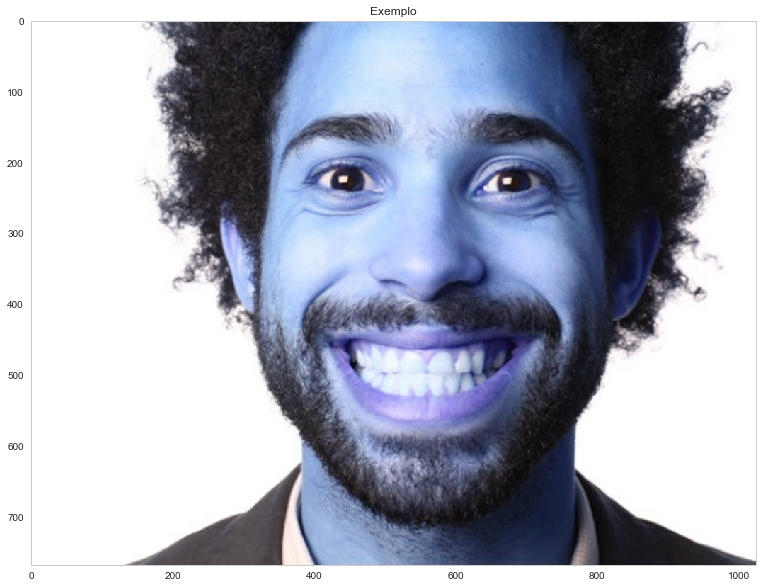

In [8]:
imagem = cv2.imread("18.jpg")
plt.figure(figsize=(20,10))
plt.title("Exemplo")
plt.imshow(imagem)

In [9]:
def identificar_sorriso(imagem):
    face_classifier = cv2.CascadeClassifier('classificadores/haarcascade_frontalface_default.xml')
    smile_classifier = cv2.CascadeClassifier('classificadores/haarcascade_smile.xml')

    gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)

    if faces is ():
         cv2.putText(imagem, "rosto ausente", (50,50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,255), 2)

    for (x,y,w,h) in faces:
        
        cv2.rectangle(imagem, (x, y), (x+w, y+h), (0, 0, 255), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = imagem[y:y+h, x:x+w]
        
        smile = smile_classifier.detectMultiScale(
            roi_gray,
            scaleFactor= 1.7,
            minNeighbors=22,
            minSize=(25, 25),
            flags=cv2.CASCADE_SCALE_IMAGE)

        # Set region of interest for smiles
        for (x, y, w, h) in smile:
            cv2.rectangle(roi_color, (x, y), (x+w, y+h), (255, 0, 0), 1)
            tamanho = int(w) * int(h)
            cv2.putText(imagem, "sorriso (%s)"%(tamanho), (50,80), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,0,0), 2)
            break

    return imagem

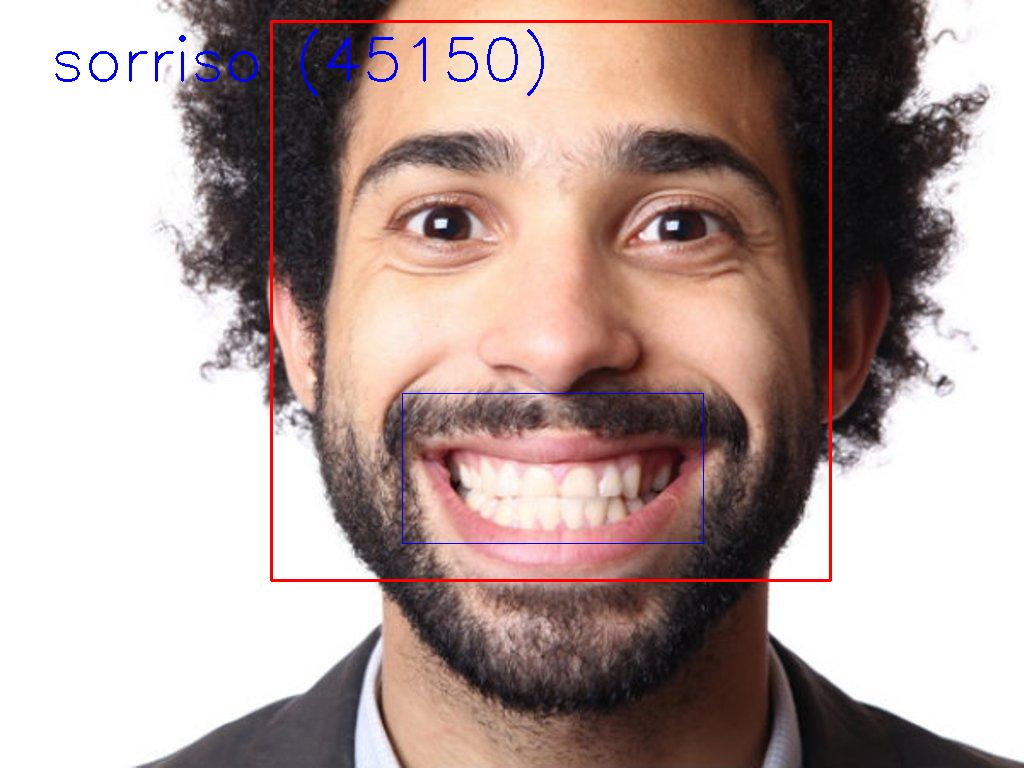

In [10]:
imagem2 = identificar_sorriso(imagem)
imagem2 = cv2.cvtColor(imagem2, cv2.COLOR_BGR2RGB)

img = PIL.Image.fromarray(imagem2, "RGB")
buffer = BytesIO()
img.save(buffer,format="JPEG")        
display(Image(data=buffer.getvalue()))

In [ ]:
#cam_capture = cv2.VideoCapture(0)

#try:
#    while True:
#        ret, frame = cam_capture.read()
#
#        if ret:
#            frame = identificar_sorriso(frame)
#            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#
#            img = PIL.Image.fromarray(frame, "RGB")
#            buffer = BytesIO()
#            img.save(buffer,format="JPEG")        
#            display(Image(data=buffer.getvalue()))
#
#            #cv2.imwrite("imagens/camera_output_1.png", frame)
#
#            clear_output(wait=True)
#except KeyboardInterrupt:
#    cam_capture.release()
#    print("Interrompido")